# Otoczka wypukła

In [2]:
import numpy as np
import pandas as pd
from bitalg.visualizer.main import Visualizer
from bitalg.tests.test2 import Test
from functools import cmp_to_key

In [3]:
def direction(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - ((a[1] - c[1]) * (b[0] - c[0]))

def distance_squared(point1, point2):
    return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

## Zbiory testowe

### Zbiór a

In [4]:
np.random.seed(88)

def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points = []
    for i in range(n):
        x = np.random.uniform(left, right)
        y = np.random.uniform(left, right)
        points.append((x, y))

    return points

In [5]:
points_a = generate_uniform_points(-100, 100, 100)

In [6]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

### Zbiór b

In [7]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []
    for i in range(n):
        angle = 2 * np.pi * np.random.uniform()
        points.append((R * np.cos(angle) + O[0], R * np.sin(angle) + O[1]))
    return points

In [8]:
points_b = generate_circle_points((0, 0), 10, 100)

In [9]:
vis.clear()
vis.add_point(points_b)
vis.show()

### Zbiór c

In [10]:
def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    points = [a,b,c,d]

    for i in range(n):
        x = np.random.uniform(a[0], b[0])
        y = a[1]
        points.append((x, y))
        x = a[0]
        y = np.random.uniform(a[1], d[1])
        points.append((x, y))
        x = np.random.uniform(a[0], b[0])
        y = c[1]
        points.append((x, y))
        x = b[0]
        y = np.random.uniform(a[1], d[1])
        points.append((x, y))

    
    return points

In [11]:
points_c = generate_rectangle_points(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

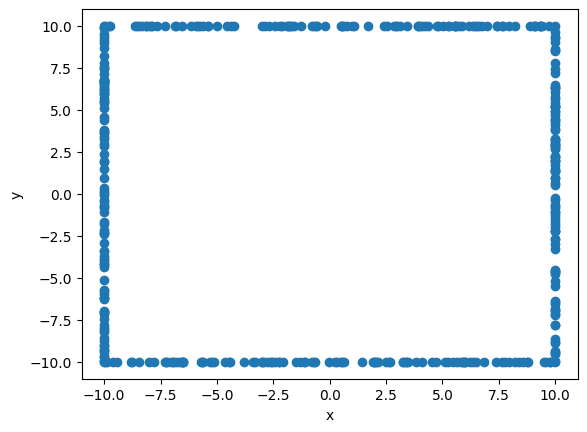

In [12]:
vis.clear()
vis.add_point(points_c)
vis.show()

### Zbiór d

In [13]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20):
    '''
    Funkcja generuje axis_n punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   z dwóch boków kwadratu równoległych do osi x i y
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    points = [a,b,c,d]

    for i in range(axis_n):
        x = np.random.uniform(a[0], b[0])
        y = a[1]
        points.append((x, y))
        x = a[0]
        y = np.random.uniform(a[1], d[1])
        points.append((x, y))

    for i in range(diag_n):
        x = np.random.uniform(a[0], c[0])
        y = x + a[1]
        points.append((x, y))
        x = np.random.uniform(d[0], b[0])
        y = d[1] - x
        points.append((x, y))
    return points

In [14]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

In [15]:
vis.clear()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama

In [122]:
def graham_algorithm(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Grahama
    :parm points: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    if len(points) < 3:return points
    eps = 10*-6
    
    a = points.index(min(points, key = lambda point: (point[1], points[0])))
    points[0], points[a] = points[a], points[0]

    a = points[0]

    def compare(b, c):
        dir = direction(a, b, c)
        if dir == 0:
            if distance_squared(a, c) > distance_squared(a, b):
                return -1
            else:
                return 1
        else:
            if dir < 0:
                return 1
            else:
                return -1

    points = sorted(points[1:] ,key=cmp_to_key(compare))
    ps = [a] + points
            
    n = len(ps)
    if n < 3: return points
    res = [ps[i] for i in range(2)]
    m = 2
    while m < n:
        if direction(res[-2], res[-1], ps[m]) == 0:
            res.pop()
            res.append(ps[m])
            m+=1
        elif direction(res[-2], res[-1], ps[m]) > 0:
            res.append(ps[m])
            m+=1
        else:
            res.pop() 
    
    return res


In [124]:
Test().runtest(1, graham_algorithm)

Lab 2, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: WRONG ANSWER
		Output:   [(33.51197443572957, -99.0), (98.9668868184126, -99.0), (99.0, -98.94228882972968), (99.0, 98.97839492836869), (98.86860522732309, 99.0), (-98.50773619207072, 99.0), (-99.0, 97.94514600306115), (-99.0, -98.81943551511642), (27.644233459617126, -99.0), (92.13974352663962, -99.0), (99.0, -90.82289238473052), (99.0, 43.95460262837986), (98.45185244448...
		Expected: [(-98.92626151979, 99.0), (-99.0, 98.90060283777726), (-99.0, -98.81943551511642), (-98.86010739059158, -99.0), (98.9668868184126, -99.0), (99.0, -98.98981089336407), (99.0, 98.97839492836869), (98.97313209577547, 99.0)]
	Test 10: Passed
	Test 11: Passed
Result: 10/11
Time: 2.370s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [144]:
def graham_algorithm_draw(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Grahama
    :parm points: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    vis.clear()
    vis.add_point(points)
    if len(points) < 3:return points
    
    a = points.index(min(points, key = lambda point: (point[1], points[0])))
    points[0], points[a] = points[a], points[0]

    a = points[0]

    def compare(b, c):
        dir = direction(a, b, c)
        if dir == 0:
            if distance_squared(a, c) > distance_squared(a, b):
                return -1
            else:
                return 1
        else:
            if dir < 0:
                return 1
            else:
                return -1

    points = sorted(points[1:] ,key=cmp_to_key(compare))
    points = [a] + points
            
    n = len(points)
    if n < 3: return points
    res = [points[i] for i in range(2)]
    ps = []
    for i in range(len(res)):
        p = vis.add_point(res[i], color = 'red')
        ps.append(p)
    l = vis.add_line_segment((res[0], res[1]), color = 'pink')
    ls = [l]


    m = 2
    while m < n:
        if direction(res[-2], res[-1], points[m]) == 0:
            res.pop()
            vis.remove_figure(ps.pop())
            vis.remove_figure(ls.pop())

            res.append(points[m])
            p = vis.add_point(res[-1], color = 'red')
            ps.append(p)
            l = vis.add_line_segment((res[-2], res[-1]), color = 'pink')
            ls.append(l)
            m+=1
        elif direction(res[-2], res[-1], points[m]) > 0:
            res.append(points[m])
            m+=1
            p = vis.add_point(res[-1], color = 'red')
            ps.append(p)
            l = vis.add_line_segment((res[-2], res[-1]), color = 'pink')
            ls.append(l)

        else:
            res.pop()
            vis.remove_figure(ps.pop())
            vis.remove_figure(ls.pop())


    l = vis.add_line_segment((res[0], res[-1]), color = 'pink')
    vis.add_polygon(res, alpha=0.5)
    for i in range(20):
        l = vis.add_point(res[0], color='red')
        vis.add_point(res[0], color='red')

    return res, vis


def partition(array, low, high, a):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if compare(a, pivot, array[j]):
            i = i + 1
            (array[i], array[j]) = (array[j], array[i])
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
def quickSort(array, low, high, a):
    if low < high:
        pi = partition(array, low, high,a )
        quickSort(array, low, pi - 1, a)
        quickSort(array, pi + 1, high,a)

def compare(a, b, c):
    dir = direction(a, b, c)
    if dir == 0:
        if distance_squared(a, c) > distance_squared(a, b):
            return False
        else:
            return True
    else:
        if dir > 0:
            return False
        else:
            return True


In [137]:
def visualize_graham(test_points):
    result = graham_algorithm(test_points)
    vis.clear()
    vis.add_point(test_points)
    vis.add_point(result, color = 'red')
    vis.add_line_segment([(result[i], result[i+1]) for i in range(len(result)-1)], color = 'green')
    vis.add_line_segment([result[-1], result[0]], color='green')
    vis.add_polygon(result, alpha=0.7)
    vis.show()

Zwizualizuj swoją implementację algorytmu.

In [145]:
np.random.seed(23)
testp = points_d
pon, vis = graham_algorithm_draw(testp)

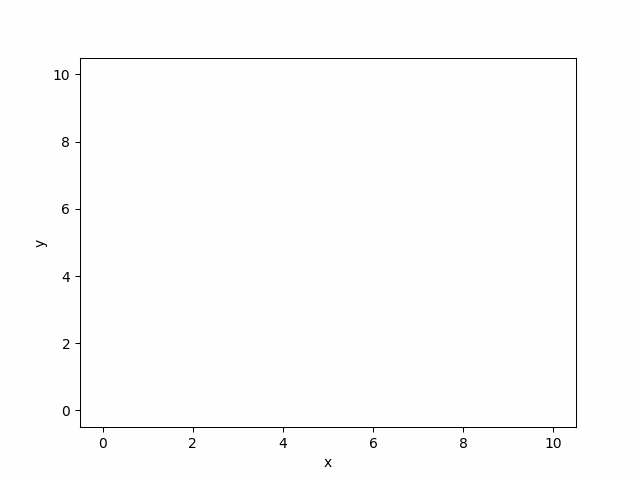

In [142]:
vis.show_gif(interval=200)

#### Zbiór danych A

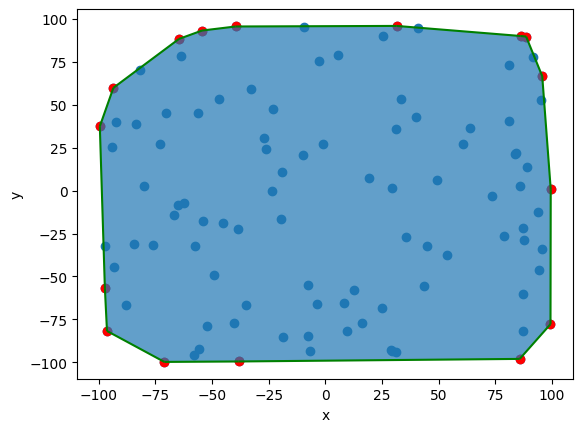

In [ ]:
visualize_graham(points_a)

#### Zbiór danych B

In [ ]:
visualize_graham(points_b)

#### Zbiór danych C

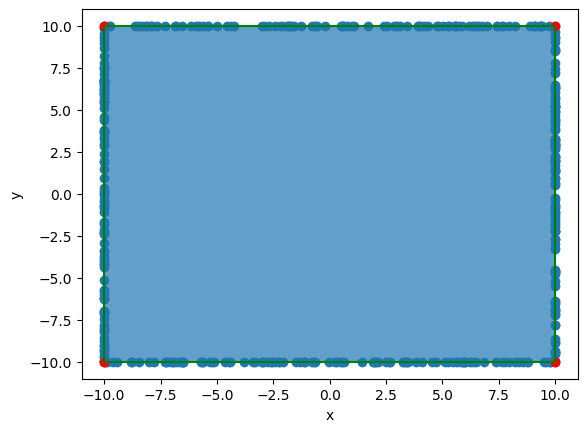

In [ ]:
visualize_graham(points_c)

#### Zbiór danych D

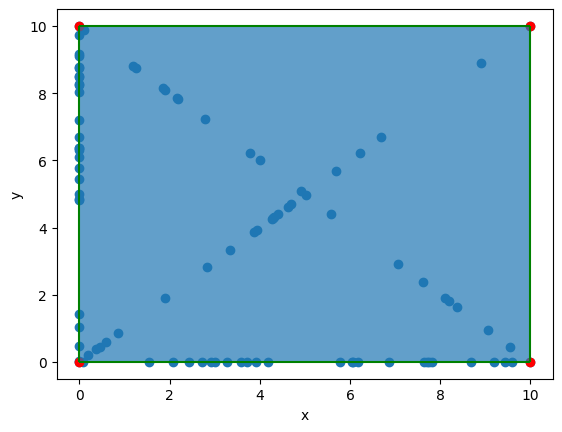

In [146]:
visualize_graham(points_d)

## Algorytm Jarvisa

In [84]:
def jarvis_algorithm(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Jarvisa
    :parm points: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''

    res = []
    a =  min(points, key = lambda point: point[0])
    index = points.index(a)
    
    l = index
    res = []
    res.append(a)
    while (True):
        q = (l + 1) % len(points)
        dist_l_q = distance_squared(points[q], points[l])

        for i in range(len(points)):
            if i == l:
                continue
            d = direction(points[l], points[i], points[q])
            if d > 0 or (d >= 0 and d < 1**-16 and distance_squared(points[i], points[l]) > dist_l_q):
                q = i

        l = q
        if l == index:
            return res
        res.append(points[q])


In [90]:
def jarvis_algorithm_draw(points):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów points algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm points: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''
    vis.clear()
    vis.add_point(points)

    res = []
    a =  min(points, key = lambda point: point[0])
    index = points.index(a)
    
    l = index
    res = []
    res.append(a)
    vis.add_point([a], color='red')
    while (True):

        q = (l + 1) % len(points)
        dist_l_q = distance_squared(points[q], points[l])

        rm, rm_or = [], []
        for i in range(len(points)):
            if i == l:
                continue

            rm = vis.add_line_segment((points[i], res[-1]), color = 'pink')
            d = direction(points[l], points[i], points[q])

            if d > 0 or (d>0 and d < 0 and distance_squared(points[i], points[l]) > dist_l_q):
                if rm_or: vis.remove_figure(rm_or)
                
                rm_or = vis.add_line_segment((points[i], res[-1]), color = 'orange')
                q = i


            if rm: vis.remove_figure(rm)


        l = q
        if l == index:
            vis.add_line_segment((res[-1], res[0]), color='green')
            pol1 = vis.add_polygon(res, alpha=0.7)
            pol2 = vis.add_polygon(res, alpha=0.1)
            for j in range(30):
                p = vis.add_point([res[-1]], color = 'red')
                vis.remove_figure(p)
            return res, vis
        res.append(points[q])
        vis.add_line_segment((res[-1], res[-2]), color='green')
        vis.add_point([points[q]], color='red')


In [ ]:
from bitalg.tests.test2 import Test

In [91]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: WRONG ANSWER
		Output:   [(-99.0, -46.014826287061524), (-99.0, -66.13502197802475), (-97.34162840246842, -99.0), (33.51197443572957, -99.0), (72.00637934668131, -99.0), (87.43654307090054, -99.0), (99.0, -93.69966362870295), (99.0, -29.799775347766285), (99.0, 0.3092668812917765), (99.0, 21.17490919617417), (99.0, 89.79819785417769), (99.0, 95.61001208347943), (99.0, 96.1...
		Expected: [(-98.92626151979, 99.0), (-99.0, 98.90060283777726), (-99.0, -98.81943551511642), (-98.86010739059158, -99.0), (98.9668868184126, -99.0), (99.0, -98.98981089336407), (99.0, 98.97839492836869), (98.97313209577547, 99.0)]
	Test 10: Passed
	Test 11: Passed
Result: 10/11
Time: 2.380s


In [ ]:
def visualize_jarvis(test_points):
    result = jarvis_algorithm(test_points)
    vis.clear()
    vis.add_point(test_points)
    vis.add_point(result, color = 'red')
    vis.add_line_segment([(result[i], result[i+1]) for i in range(len(result)-1)], color = 'green')
    vis.add_line_segment([result[-1], result[0]], color='green')
    vis.add_polygon(result, alpha=0.7)
    vis.show()

Zwizualizuj swoją implementację algorytmu.

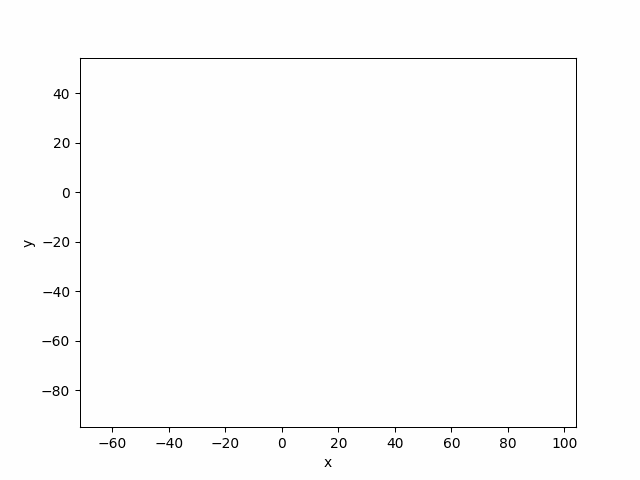

In [ ]:
np.random.seed(123)
test_points = generate_uniform_points(n = 10)
result, vis_jarvis = jarvis_algorithm_draw(test_points)
vis_jarvis.show_gif(interval=100)

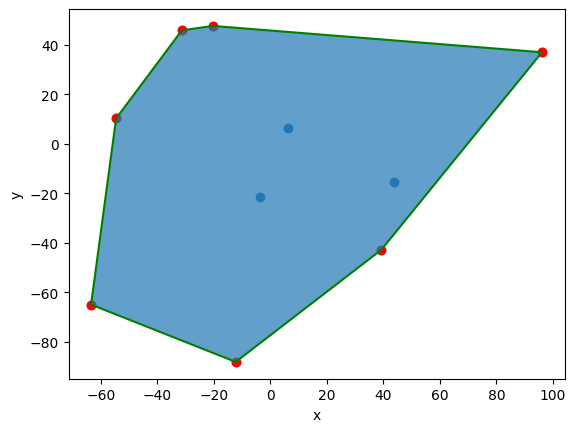

In [ ]:
visualize_jarvis(test_points)

#### Zbiór danych A

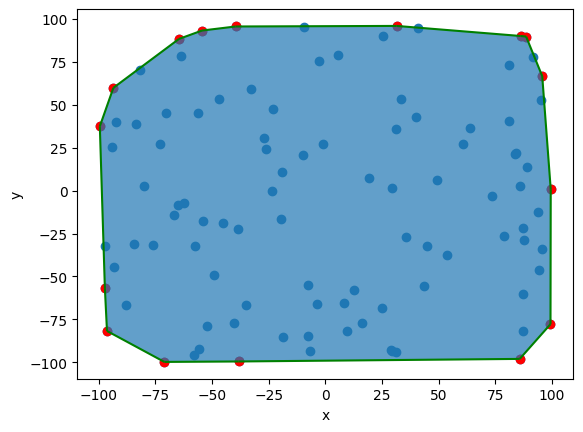

In [ ]:
visualize_jarvis(points_a)

#### Zbiór danych B

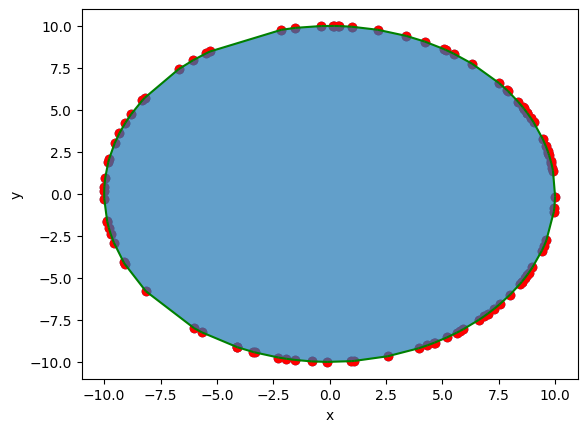

In [ ]:
visualize_jarvis(points_b)

#### Zbiór danych C

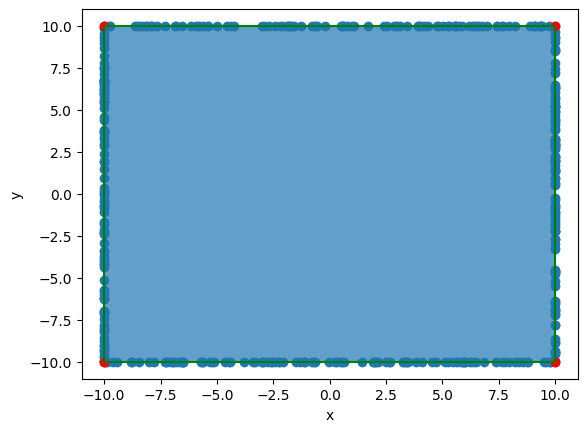

In [ ]:
visualize_jarvis(points_c)

#### Zbiór danych D

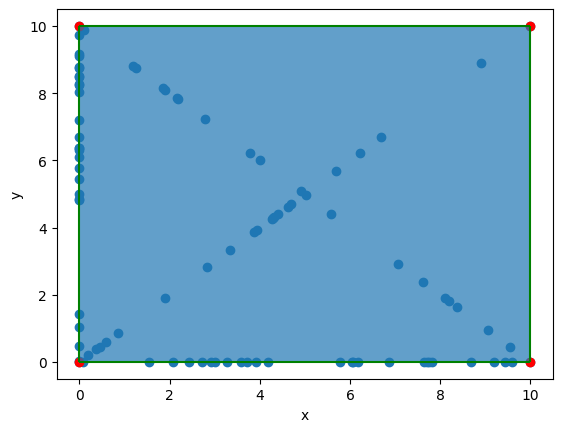

In [ ]:
visualize_jarvis(points_d)

### 

## Porównanie czasów

In [148]:
np.random.seed(123)

In [149]:
from time import time
times = [[] for _ in range(4)]
def measure(func, arg):
    st = time()
    func(arg)
    end = time()
    return end-st

#### Zbiór a

In [150]:
left = [10**i for i in range(2,7)]
amount = [10**i for i in range(2,7)]
for i in range(len(left)):
    test = generate_uniform_points(-left[i], left[i], amount[i])
    times[0].append(measure(graham_algorithm,test))
    times[0].append(measure(jarvis_algorithm, test))

In [151]:
a_spec = [left, amount]

#### Zbiór b

In [152]:
left = [10**i for i in range(2,5)]
amount = [10**i for i in range(2,5)]
for i in range(len(left)):
    test = generate_circle_points((0,0), left[i], amount[i])
    times[1].append(measure(graham_algorithm,test))
    times[1].append(measure(jarvis_algorithm, test))

In [153]:
b_spec = [left, amount]

#### Zbiór c

In [154]:
left = [10**i for i in range(2,7)]
amount = [10**i for i in range(2,7)]
for i in range(len(left)):
    a = (-left[i], -left[i])
    b = (left[i], -left[i])
    c = (left[i], left[i])
    d = (-left[i], left[i])
    test = generate_rectangle_points(a, b,c,d, amount[i])
    times[2].append(measure(graham_algorithm,test))
    times[2].append(measure(jarvis_algorithm, test))

In [155]:
c_spec = [left, amount]

#### Zbiór d

In [156]:
left = [10**i for i in range(2,7)]
amount = [10**i for i in range(2,7)]
for i in range(len(left)):
    a = (-left[i], -left[i])
    b = (left[i], -left[i])
    c = (left[i], left[i])
    d = (-left[i], left[i])
    test = generate_square_points(a, b,c,d, amount[i], amount[i])
    times[3].append(measure(graham_algorithm,test))
    times[3].append(measure(jarvis_algorithm, test))

In [157]:
d_spec = [left, amount]

#### Wyniki

In [165]:
spec = [a_spec, b_spec, c_spec, d_spec]
def gen(test_set):
    datae = {}
    algorytm = ["Graham", "Jarvis"]
    datae["Algorytm"] = algorytm
    for i in range(len(spec[test_set][1])):
        datae[spec[test_set][1][i]] = [round(times[test_set][i * 2], 3), round(times[test_set][2*i + 1], 3)]
    return datae


In [170]:
df = pd.DataFrame(data = gen(0))
df

Algorytm    100   1000  10000  100000  1000000
0   Graham  0.002  0.018  0.069   0.870   11.753
1   Jarvis  0.002  0.013  0.093   1.181   15.656

In [171]:
df = pd.DataFrame(data = gen(1))
df

Algorytm    100   1000   10000
0   Graham  0.001  0.008   0.097
1   Jarvis  0.006  0.657  71.206

In [172]:
df = pd.DataFrame(data = gen(2))
df

Algorytm    100   1000  10000  100000  1000000
0   Graham  0.003  0.046  0.568   7.713   93.669
1   Jarvis  0.001  0.009  0.103   1.031    9.841

In [173]:
df = pd.DataFrame(data = gen(3))
df

Algorytm    100   1000  10000  100000  1000000
0   Graham  0.002  0.026  0.272   3.975   47.540
1   Jarvis  0.002  0.014  0.164   2.000   21.828

In [174]:
times

[[0.001558542251586914,
  0.0015578269958496094,
  0.0184018611907959,
  0.013007164001464844,
  0.06888508796691895,
  0.09339404106140137,
  0.8698828220367432,
  1.1809422969818115,
  11.753052711486816,
  15.655795097351074],
 [0.0006287097930908203,
  0.006094455718994141,
  0.007782697677612305,
  0.6571652889251709,
  0.0970926284790039,
  71.20626544952393],
 [0.00296783447265625,
  0.0011258125305175781,
  0.04553675651550293,
  0.00944066047668457,
  0.5676238536834717,
  0.10296130180358887,
  7.713114261627197,
  1.0305302143096924,
  93.6686463356018,
  9.840947151184082],
 [0.002003908157348633,
  0.0018165111541748047,
  0.025503873825073242,
  0.013608932495117188,
  0.2722208499908447,
  0.16427183151245117,
  3.9748377799987793,
  2.000063180923462,
  47.53985142707825,
  21.827919483184814]]